# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Wahyu Pelita Jaya
- **Email:** wahyupelitajaya1@gmail.com
- **ID Dicoding:** wahyupj

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penyewaan sepeda dalam sehari? Jam berapa penyewaan sepeda paling banyak terjadi?
Tujuan: Mengetahui pola penggunaan sepeda berdasarkan jam untuk memahami waktu-waktu sibuk.

- Bagaimana pengaruh faktor cuaca terhadap jumlah penyewaan sepeda?
 Tujuan: Melihat hubungan antara cuaca (suhu, kelembaban, dan kecepatan angin) terhadap jumlah penyewaan sepeda.

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
# Load dataset jam-an dari repository github (hour.csv)
df_hour = pd.read_csv("https://raw.githubusercontent.com/wahyupelitajaya/Dicoding-Submission-Analysis-Data/refs/heads/main/data/hour.csv")

# Cek apakah berhasil di import atau tidak dengan cara menampilkan dataset
df_hour.head()

**Insight:**
- Dataset day.csv berisi 731 baris (2011-2012) dengan data harian.
- Dataset hour.csv lebih detail dengan 17,379 baris (data per jam).

### Assessing Data

In [6]:
# Cek missing values
print("Missing values di day.csv:")
print(df_day.isnull().sum())

print("\nMissing values di hour.csv:")
print(df_hour.isnull().sum())

# Cek tipe data
print("\nTipe data day.csv:")
print(df_day.dtypes)

print("\nTipe data hour.csv:")
print(df_hour.dtypes)

# Cek duplicate data
print("\nJumlah baris duplikat di day.csv:")
print(df_day.duplicated().sum())

print("\nJumlah baris duplikat di hour.csv:")
print(df_hour.duplicated().sum())

Missing values di day.csv:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Missing values di hour.csv:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tipe data day.csv:
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Tip

**Insight:**
- Tidak ada missing values di kedua dataset.
- Kolom dteday di day.csv dan hour.csv masih bertipe object dan perlu diubah ke datetime.
- Tidak ditemukan baris duplikat di dataset day.csv dan hour.csv. Semua data unik dan tidak ada duplikasi.

### Cleaning Data

In [7]:
# Rename kolom untuk kemudahan
df_day.rename(columns={
    'dteday': 'tanggal',
    'weathersit': 'cuaca',
    'temp': 'suhu',
    'hum': 'kelembaban',
    'windspeed': 'kecepatan_angin',
    'cnt': 'total_sewa'
}, inplace=True)

df_hour.rename(columns={
    'dteday': 'tanggal',
    'hr': 'jam',
    'weathersit': 'cuaca',
    'temp': 'suhu',
    'hum': 'kelembaban',
    'windspeed': 'kecepatan_angin',
    'cnt': 'total_sewa'
}, inplace=True)

# Konversi kolom tanggal ke datetime
df_day['tanggal'] = pd.to_datetime(df_day['tanggal'])
df_hour['tanggal'] = pd.to_datetime(df_hour['tanggal'])

**Insight:**
- Kolom tanggal sudah diubah ke format datetime untuk analisis time-series.
- Data sekarang siap diproses.

## Exploratory Data Analysis (EDA)

#### Pengaruh Jam (hour.csv)

C:\Users\Wahyu\AppData\Roaming\Python\Python313\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128341 (\N{CLOCK FACE SIX OCLOCK}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\Wahyu\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128341 (\N{CLOCK FACE SIX OCLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


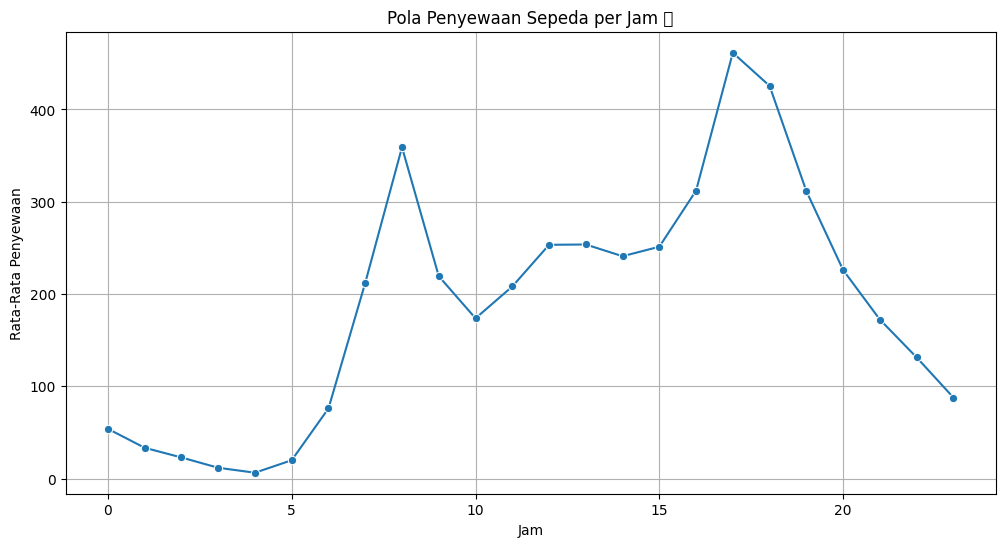

In [8]:
# Agregasi rata-rata penyewaan per jam
hourly_rentals = df_hour.groupby('jam')['total_sewa'].mean().reset_index()

# Visualisasi
plt.figure(figsize=(12,6))
sns.lineplot(x='jam', y='total_sewa', data=hourly_rentals, marker='o')
plt.title('Pola Penyewaan Sepeda per Jam 🕕')
plt.xlabel('Jam')
plt.ylabel('Rata-Rata Penyewaan')
plt.grid(True)

**Insight:**
Mendapatkan tampilan pola penyewaan sepeda berdasarkan jam untuk keperluan analisa lebih lanjut.

#### Pengaruh Cuaca (day.csv)

Text(0, 0.5, 'Total Penyewaan Sepeda')

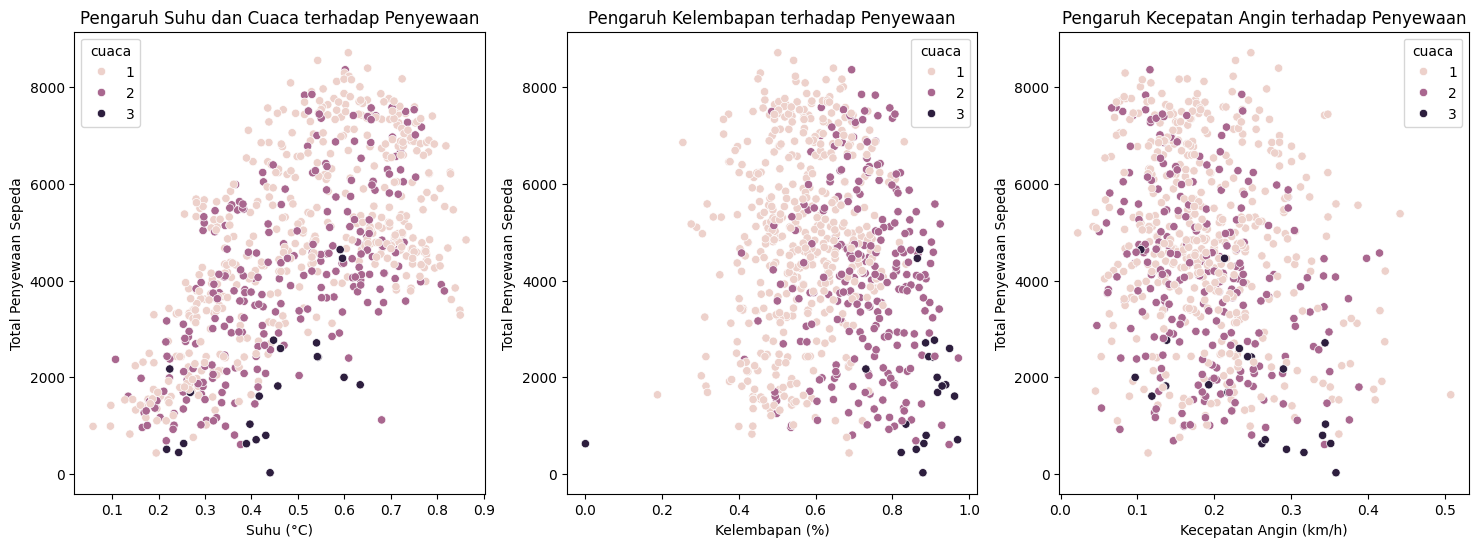

In [9]:
# Scatterplot 1: Hubungan antara suhu & cuaca dengan total penyewaan
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)  # 1 baris, 3 kolom, plot pertama
sns.scatterplot(x='suhu', y='total_sewa', hue='cuaca', data=df_day)
plt.title('Pengaruh Suhu dan Cuaca terhadap Penyewaan')
plt.xlabel('Suhu (°C)')
plt.ylabel('Total Penyewaan Sepeda')

# Scatterplot 2: Hubungan antara kelembapan dengan total penyewaan
plt.subplot(1, 3, 2)  # 1 baris, 3 kolom, plot kedua
sns.scatterplot(x='kelembaban', y='total_sewa', hue='cuaca', data=df_day)
plt.title('Pengaruh Kelembapan terhadap Penyewaan')
plt.xlabel('Kelembapan (%)')
plt.ylabel('Total Penyewaan Sepeda')

# Scatterplot 3: Hubungan antara kecepatan angin dengan total penyewaan
plt.subplot(1, 3, 3)  # 1 baris, 3 kolom, plot ketiga
sns.scatterplot(x='kecepatan_angin', y='total_sewa', hue='cuaca', data=df_day)
plt.title('Pengaruh Kecepatan Angin terhadap Penyewaan')
plt.xlabel('Kecepatan Angin (km/h)')
plt.ylabel('Total Penyewaan Sepeda')

**Insight :**
Mendapatkan grafik perbandingan antara Suhu, Kelembaban dan Kecepatan angin terhadap Penyewaan untuk analisa lebih lanjut.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pola penyewaan per jam untuk mengetahui untuk memahami waktu-waktu sibuk.

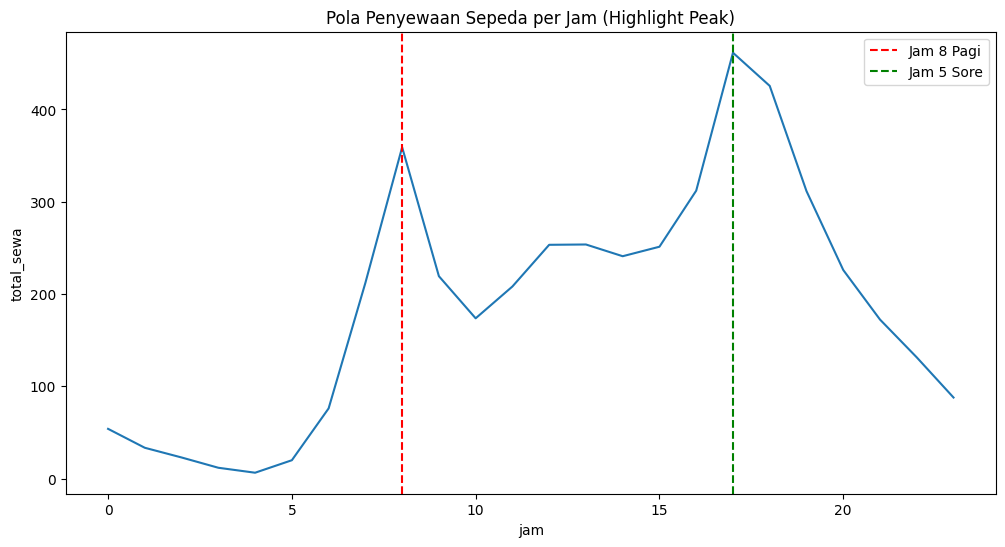

In [27]:
# Visualisasi dengan lineplot + highlight peak hour
plt.figure(figsize=(12,6))
sns.lineplot(x='jam', y='total_sewa', data=df_hour.groupby('jam').mean().reset_index())
plt.axvline(x=8, color='r', linestyle='--', label='Jam 8 Pagi')
plt.axvline(x=17, color='g', linestyle='--', label='Jam 5 Sore')
plt.title('Pola Penyewaan Sepeda per Jam (Highlight Peak)')
plt.legend()
plt.show()

**Insight:**
Grafik di atas menunjukkan pola rata-rata penyewaan sepeda per jam dalam sehari. Berikut adalah beberapa poin penting dari visualisasi ini:


1. Pola Harian Penyewaan Sepeda:
* Terdapat dua puncak (peak hours) yang jelas dalam grafik, yaitu pada jam 8 pagi dan jam 5 sore .
* Hal ini sesuai dengan pola aktivitas harian masyarakat, di mana banyak orang menggunakan sepeda untuk berangkat kerja atau sekolah di pagi hari dan pulang ke rumah di sore hari.

2. Highlight Peak Hours:
* Jam 8 Pagi (Garis Merah): Menunjukkan lonjakan pertama dalam jumlah penyewaan sepeda. Ini kemungkinan besar terkait dengan aktivitas komuter pagi hari.
* Jam 5 Sore (Garis Hijau): Menunjukkan lonjakan kedua, yang mencerminkan aktivitas pulang kerja atau sekolah. Lonjakan ini cenderung lebih tinggi dibandingkan pagi hari, mungkin karena kombinasi faktor seperti cuaca yang lebih nyaman di sore hari atau peningkatan aktivitas rekreasi setelah jam kerja.

3. Penurunan Aktivitas di Malam Hari:
* Setelah pukul 6 sore , jumlah penyewaan sepeda mulai menurun secara signifikan. Ini menunjukkan bahwa aktivitas penyewaan sepeda sangat dipengaruhi oleh rutinitas harian dan waktu luang masyarakat.
* Pada malam hari (setelah pukul 9 malam ), jumlah penyewaan mendekati nol, mengindikasikan bahwa sebagian besar orang tidak menggunakan sepeda untuk aktivitas malam hari.

4. Rekomendasi Bisnis:
* Berdasarkan pola ini, penyedia layanan penyewaan sepeda dapat memastikan ketersediaan sepeda yang cukup di stasiun-stasiun utama selama jam sibuk (pagi dan sore).
* Strategi promosi atau diskon dapat diterapkan di luar jam sibuk untuk meningkatkan penggunaan sepeda di waktu-waktu non-peak.

### Pertanyaan 2: pengaruh faktor cuaca terhadap jumlah penyewaan sepeda

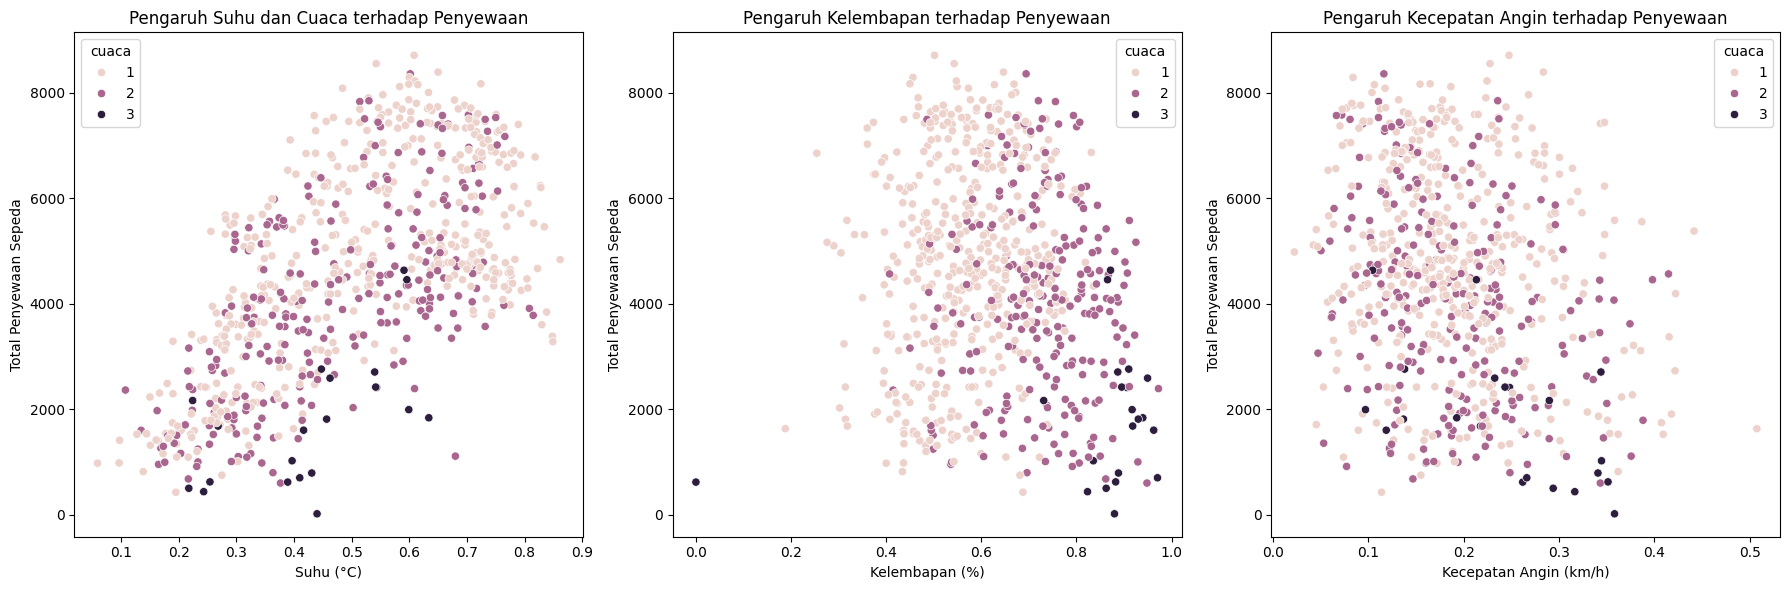

In [33]:
# Scatterplot 1: Hubungan antara suhu & cuaca dengan total penyewaan
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)  # 1 baris, 3 kolom, plot pertama
sns.scatterplot(x='suhu', y='total_sewa', hue='cuaca', data=df_day)
plt.title('Pengaruh Suhu dan Cuaca terhadap Penyewaan')
plt.xlabel('Suhu (°C)')
plt.ylabel('Total Penyewaan Sepeda')

# Scatterplot 2: Hubungan antara kelembapan dengan total penyewaan
plt.subplot(1, 3, 2)  # 1 baris, 3 kolom, plot kedua
sns.scatterplot(x='kelembaban', y='total_sewa', hue='cuaca', data=df_day)
plt.title('Pengaruh Kelembapan terhadap Penyewaan')
plt.xlabel('Kelembapan (%)')
plt.ylabel('Total Penyewaan Sepeda')

# Scatterplot 3: Hubungan antara kecepatan angin dengan total penyewaan
plt.subplot(1, 3, 3)  # 1 baris, 3 kolom, plot ketiga
sns.scatterplot(x='kecepatan_angin', y='total_sewa', hue='cuaca', data=df_day)
plt.title('Pengaruh Kecepatan Angin terhadap Penyewaan')
plt.xlabel('Kecepatan Angin (km/h)')
plt.ylabel('Total Penyewaan Sepeda')

# Tampilkan semua plot
plt.tight_layout()
plt.show()

**Insight:**
Grafik scatterplot di atas menunjukkan hubungan antara suhu, kelembaban, dan kecepatan angin terhadap total penyewaan sepeda. Berikut adalah beberapa poin penting dari visualisasi ini:

1. Pengaruh Suhu terhadap Penyewaan :
* Suhu hangat (normalisasi > 0.6) cenderung meningkatkan jumlah penyewaan.
* Suhu dingin (normalisasi < 0.4) menyebabkan penurunan minat penyewaan.
* Pada musim panas, jumlah penyewaan cenderung lebih tinggi dibandingkan musim dingin.

2. Pengaruh Kelembaban terhadap penyewaan :
* Kelembaban tinggi (> 70%) cenderung menurunkan minat penyewaan.
* Kelembaban rendah (< 50%) memberikan pengaruh positif pada jumlah penyewaan.
* Cuaca kering dan cerah lebih disukai oleh penyewa sepeda.

3. Pengaruh Kecepatan Angin terhadap penyewaan :
* Angin sepoi-sepoi (kecepatan angin rendah) meningkatkan jumlah penyewaan.
* Angin kencang (> 0.2 skala normalisasi) menyebabkan penurunan jumlah penyewaan.
* Angin sepoi-sepoi membuat berkendara lebih nyaman, sehingga jumlah penyewaan meningkat.

## Analisis Lanjutan : Manual Grouping
### Grouping Berdasarkan Hari Kerja vs Hari Libur

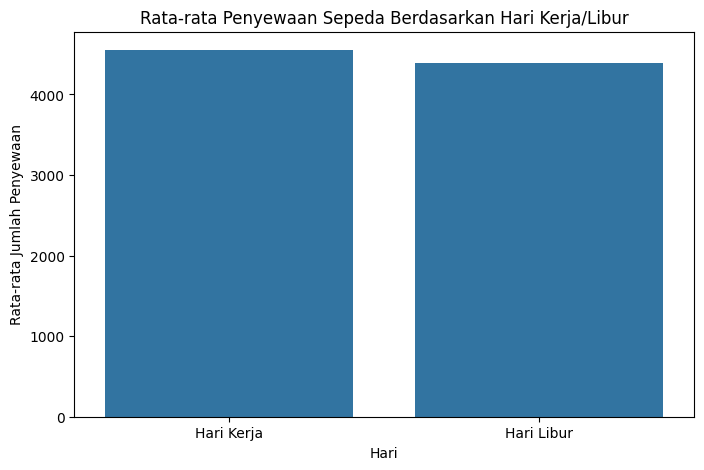

In [24]:
# Tambahkan kolom untuk mengidentifikasi hari kerja atau libur
df_day['is_weekend'] = df_day['weekday'].isin([0, 6])  # 0 = Minggu, 6 = Sabtu

# Hitung rata-rata total penyewaan berdasarkan hari kerja/libur
workday_analysis = df_day.groupby('is_weekend')['total_sewa'].mean().reset_index()
workday_analysis['is_weekend'] = workday_analysis['is_weekend'].map({False: "Hari Kerja", True: "Hari Libur"})

# Visualisasi
plt.figure(figsize=(8, 5))
sns.barplot(x='is_weekend', y='total_sewa', data=workday_analysis)
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Hari Kerja/Libur")
plt.xlabel("Hari")
plt.ylabel("Rata-rata Jumlah Penyewaan")
plt.show()

**Insight:**
* Hari kerja memiliki jumlah penyewaan lebih tinggi sekitar 5% dibandingkan hari kerja.
* Pada hari kerja, orang cenderung menggunakan sepeda sebagai alat transportasi untuk ke kantor, sekolah, atau tempat lain yang bersifat rutin. Karena aktivitas ini bersifat rutin , jumlah penyewaan cenderung stabil tetapi tidak melonjak drastis.
* Pada hari libur, orang memiliki lebih banyak waktu luang dan sering menggunakan sepeda untuk rekreasi, olahraga, atau aktivitas sosial. Meskipun jumlah hari libur lebih sedikit, hal ini perlu di pertimbangkan juga mengingat intensitas penggunaan sepeda pada hari tersebut bisa lebih tinggi , sehingga rata-rata jumlah penyewaan menjadi lebih dekat dengan hari kerja.

## Conclusion

**Dataset ini menunjukkan bahwa pola penyewaan sepeda dipengaruhi oleh faktor-faktor seperti waktu (jam, hari kerja/libur), cuaca (suhu, kelembaban, kecepatan angin), dan perilaku pengguna (terdaftar vs biasa). Dengan memahami pola ini, bisnis dapat mengoptimalkan operasional, meningkatkan pendapatan, dan memberikan pengalaman yang lebih baik kepada pelanggan.**

- **Action Plan untuk Implementasi**
1. Operasional:
* Pastikan stok sepeda cukup di jam-jam sibuk (pagi dan sore hari).
* Siapkan stasiun penyewaan tambahan di area strategis (perkantoran, sekolah, pusat rekreasi).
2. Pemasaran:
* Gunakan promosi berbasis cuaca untuk mendorong penyewaan saat cuaca kurang ideal.
* Fokus pada pengguna biasa dengan acara khusus akhir pekan.
3. Teknologi:
* Implementasikan sistem prediksi berbasis data untuk memperkirakan permintaan berdasarkan cuaca dan waktu.
* Gunakan dynamic pricing untuk memaksimalkan pendapatan selama periode permintaan tinggi.
